# Гарапко Даниил, группа 858641

# Лабораторная работа №5 “Метод опорных векторов”

In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from scipy import optimize
from scipy.io import loadmat
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

## Task 1

Набор данных ex5data1.mat представляет собой файл формата *.mat
(т.е. сохраненного из Matlab). Набор содержит три переменные X<sub>1</sub> и X<sub>2</sub>
(независимые переменные) и y (метка класса). Данные являются линейно
разделимыми.

1. Загрузите данные ex5data1.mat из файла.

In [0]:
task1_file_name = "Data\Lab 5\ex5data1.mat"
mat = loadmat(task1_file_name)  # load mat-file
X = mat['X']
y = mat['y']

2. Постройте график для загруженного набора данных: по осям - переменные X<sub>1</sub>, X<sub>2</sub>, а точки, принадлежащие различным классам должны быть обозначены различными маркерами.

In [0]:
df_task1 = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'y':y[:,0]})

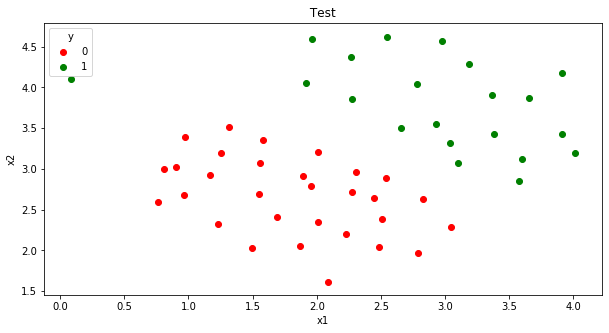

In [0]:
groups_task = df_task1.groupby('y')
colors_task = {0:'red', 1:'green'}
labels_task = {0:'0',  1:'1'}

fig, ax = plt.subplots(figsize=(10, 5))

for label, group in groups_task:
    ax.scatter(group['x1'], group['x2'], c=colors_task[label], label=labels_task[label])
ax.set(xlabel='x1', ylabel='x2', title=' Test ')
ax.legend(title='y')
plt.show()

3. Обучите классификатор с помощью библиотечной реализации SVM с линейным ядром на данном наборе.

In [0]:
svclassifier = SVC(C=100,kernel='linear')
svclassifier.fit(X, y[:,0])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svclassifier.predict(X)

In [0]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1], dtype=uint8)

4. Постройте разделяющую прямую для классификаторов с различными
параметрами C = 1, C = 100 (совместно с графиком из пункта 2).
Объясните различия в полученных прямых?

In [0]:
clf = SVC(C = 1, kernel = 'linear')
clf.fit(X, y[:,0])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[1.40718563 2.13398052]]
b =  [-10.34889778]
Indices of support vectors =  [20 21 24 25 42 47  4 11 12 14 19 50]
Support vectors =  [[1.5841   3.3575  ]
 [2.0103   3.2039  ]
 [2.3099   2.9584  ]
 [2.8283   2.6309  ]
 [1.3191   3.5109  ]
 [2.5403   2.8867  ]
 [3.5772   2.856   ]
 [3.1048   3.0709  ]
 [1.9182   4.0534  ]
 [2.6555   3.5008  ]
 [3.0357   3.3165  ]
 [0.086405 4.1045  ]]
Number of support vectors for each class =  [6 6]
Coefficients of the support vector in the decision function =  [[1.         1.         1.         1.         0.49924348 1.
  1.         1.         0.5695935  1.         0.92964998 1.        ]]


In [0]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]

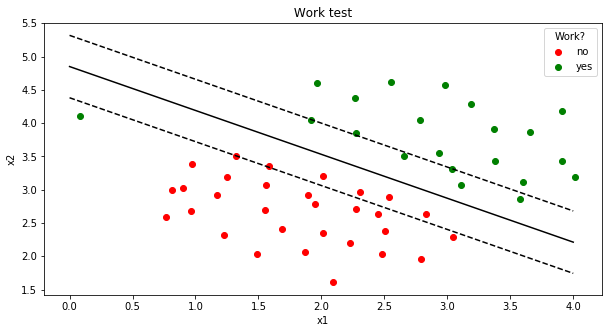

In [0]:
groups_task = df_task1.groupby('y')
colors_task = {0:'red', 1:'green'}
labels_task = {0:'no',  1:'yes'}
w = clf.coef_.flatten()
b = clf.intercept_.item()

fig, ax = plt.subplots(figsize=(10, 5))

for label, group in groups_task:
    ax.scatter(group['x1'], group['x2'], c=colors_task[label], label=labels_task[label])
ax.set(xlabel='x1', ylabel='x2', title=' Work test ')
ax.legend(title='Work?')
xo = np.linspace(0, 4.5, 10)
# yo = (b+w[0]*xo)/(-w[1])
# w.x + b = 0
a0 = 0; a1 = f(a0, w, b)
b0 = 4; b1 = f(b0, w, b)
plt.plot([a0,b0], [a1,b1], 'k')
# w.x + b = 1
a0 = 0; a1 = f(a0, w, b, 1)
b0 = 4; b1 = f(b0, w, b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')
# w.x + b = -1
a0 = 0; a1 = f(a0, w, b, -1)
b0 = 4; b1 = f(b0, w, b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')
# plt.plot(xo, yo, 'b', color='blue')
plt.show()

In [0]:
clf = SVC(C = 100, kernel = 'linear')
clf.fit(X, y[:,0])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[ 4.68150544 13.08944402]]
b =  [-53.13044783]
Indices of support vectors =  [42  4 50]
Support vectors =  [[1.3191   3.5109  ]
 [3.5772   2.856   ]
 [0.086405 4.1045  ]]
Number of support vectors for each class =  [1 2]
Coefficients of the support vector in the decision function =  [[96.67202919 35.47863237 61.19339683]]


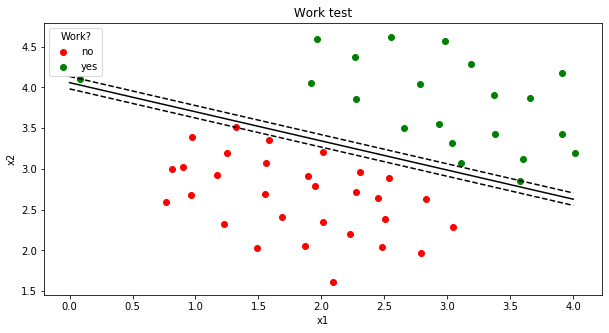

In [0]:
groups_task = df_task1.groupby('y')
colors_task = {0:'red', 1:'green'}
labels_task = {0:'no',  1:'yes'}
w = clf.coef_.flatten()
b = clf.intercept_.item()

fig, ax = plt.subplots(figsize=(10, 5))

for label, group in groups_task:
    ax.scatter(group['x1'], group['x2'], c=colors_task[label], label=labels_task[label])
ax.set(xlabel='x1', ylabel='x2', title=' Work test ')
ax.legend(title='Work?')
xo = np.linspace(0, 4.5, 10)
# yo = (b+w[0]*xo)/(-w[1])
# w.x + b = 0
a0 = 0; a1 = f(a0, w, b)
b0 = 4; b1 = f(b0, w, b)
plt.plot([a0,b0], [a1,b1], 'k')
# w.x + b = 1
a0 = 0; a1 = f(a0, w, b, 1)
b0 = 4; b1 = f(b0, w, b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')
# w.x + b = -1
a0 = 0; a1 = f(a0, w, b, -1)
b0 = 4; b1 = f(b0, w, b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')
# plt.plot(xo, yo, 'b', color='blue')
plt.show()

5. Реализуйте функцию вычисления Гауссового ядра для алгоритма SVM.

In [0]:
def hauss_kernel(x, l=None, C=1, sigma=1.0):
    similarity = lambda x, l: np.exp(-(1/2*sigma**2)*np.sum(np.square(x-l), axis=0))
    hauss_kernels = []
    if l is None:
        for i in range(len(x)):
            hauss_kernels.append(similarity(x.T, x.T[:, i:i+1]))
    else:
        for i in range(len(l)):
            hauss_kernels.append(similarity(x.T, l.T[:, i:i+1]))
    return np.array(hauss_kernels)

In [0]:
m = len(X)
x = np.hstack((np.ones((m,1)), X))
# x = x.T
f = hauss_kernel(x)
# x.shape

## Task 2

Набор данных ex5data2.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X<sub>1</sub> и X<sub>2</sub> (независимые переменные) и y (метка класса). Данные являются нелинейно разделимыми.

6. Загрузите данные ex5data2.mat из файла.

In [0]:
task2_file_name = "Data\Lab 5\ex5data2.mat"
mat = loadmat(task2_file_name)  # load mat-file
X = mat['X']
y = mat['y']

In [0]:
df_task2 = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'y':y[:,0]})

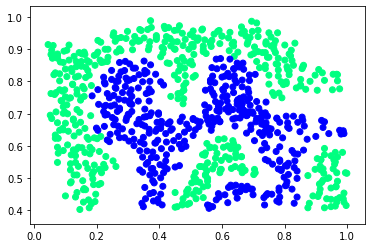

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap='winter')
plt.show()

7. Обработайте данные с помощью функции Гауссового ядра.

In [0]:
m = len(X)
l=np.array([[0.1, 0.6],[0.1, 0.9],[0.4, 0.6],[0.3, 0.8],[0.5, 0.9],[0.5, 0.5],[0.6, 0.7],[0.6, 0.4],[0.9, 0.5],[0.8, 0.6],[0.9, 0.8],[0.7, 0.9],[0.5, 0.6]])
# x = np.hstack((np.ones((m,1)), X))
f = hauss_kernel(X, X[:100,:])
f = np.hstack((np.ones((m,1)), f.T)).T

In [0]:
f.shape

(101, 863)

In [0]:
y.shape

(863, 1)

8. Обучите классификатор SVM.

In [0]:
clf = SVC(C = 10.0, kernel = 'linear')
clf.fit(f.T, y[:,0])

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
print('w = ',clf.coef_)
print('b = ',clf.intercept_)

w =  [[ 2.27373675e-13 -1.83560467e+00 -1.61866728e+00 -1.45922244e+00
  -1.13108607e+00 -1.83306207e-01  1.10184459e+00  1.30108740e+00
   8.07812494e-01 -1.06748641e+00 -2.96035882e+00 -4.65759736e+00
  -4.65685360e+00 -3.51097202e+00 -2.04031912e+00 -1.57253722e+00
  -4.36501223e+00 -5.73592283e+00 -6.89842253e+00 -4.89680869e+00
  -2.66049591e+00  6.02506030e-01  1.70767419e-01 -8.32070180e-01
  -1.82782865e+00 -7.35427425e-01  3.05080345e-01  1.28569602e+00
   1.53318173e+00  1.26684326e+00  4.59424647e-01 -2.45692214e-01
  -2.90294112e-01 -3.20410949e-01 -3.56749082e-01 -4.05416466e-01
  -5.93023744e-01 -6.45666111e-01 -8.13449055e-01 -1.17503809e+00
  -1.29781646e+00 -1.38478209e+00 -1.53682854e+00 -1.59030994e+00
  -1.44374230e+00 -1.44982157e+00 -1.70741961e+00 -2.52075778e+00
  -2.65693380e+00 -2.07489468e+00 -1.76073406e+00 -1.74869643e+00
  -1.48195729e+00 -1.21473278e+00 -9.97352217e-01 -7.87398126e-01
  -7.23448647e-01 -3.25935112e-01 -8.75864266e-02  2.03282459e-02
  -2.

In [0]:
svclassifier = SVC(kernel='rbf', gamma = 15.0, C=10)
svclassifier.fit(X, y[:,0])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=15.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = svclassifier.predict(X)
np.mean(y_pred == y.flatten()) * 100

96.52375434530707

9. Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).


In [0]:
groups_task = df_task2.groupby('y')
colors_task = {0:'red', 1:'green'}
labels_task = {0:'no',  1:'yes'}

xx, yy = np.meshgrid(np.arange(0.0, 1.2, 0.01),
                     np.arange(0.3, 1.1, 0.01))

In [0]:
def hypotetic_func(x, t, l):
    map_h2y = lambda h: 1 if h >= 1 else 0
    map_h2y = np.vectorize(map_h2y)
    f = hauss_kernel(x.T, l)
    f = np.hstack((np.ones((len(f.T),1)), f.T)).T
#     print(t.shape, f.shape)
    h = np.dot(t, f)
    return map_h2y(h)

[0]


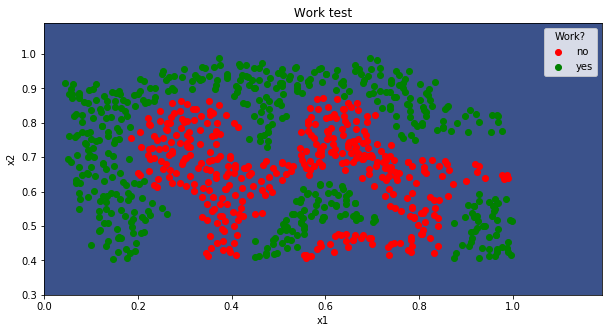

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

w = clf.coef_
zz = np.array([xx.ravel(), yy.ravel()])
z = hypotetic_func(zz, w, X[:100,:])
z = z.reshape(xx.shape)
print(np.unique(z))
plt.contourf(xx, yy, z)

for label, group in groups_task:
    ax.scatter(group['x1'], group['x2'], c=colors_task[label], label=labels_task[label])
ax.set(xlabel='x1', ylabel='x2', title=' Work test ')
ax.legend(title='Work?')
plt.show()

In [0]:
groups_task = df_task2.groupby('y')
colors_task = {0:'red', 1:'green'}
labels_task = {0:'no',  1:'yes'}

xx, yy = np.meshgrid(np.arange(0.0, 1.2, 0.01),
                     np.arange(0.3, 1.1, 0.01))

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z)

for label, group in groups_task:
    ax.scatter(group['x1'], group['x2'], c=colors_task[label], label=labels_task[label])
ax.set(xlabel='x1', ylabel='x2', title=' Work test ')
ax.legend(title='Work?')
plt.show()

10.Загрузите данные ex5data3.mat из файла

In [0]:
task3_file_name = "Data\Lab 5\ex5data3.mat"
mat = loadmat(task3_file_name)  # load mat-file
X = mat['X']
y = mat['y']
Xval = mat['Xval']
yval = mat['yval']

11.Вычислите параметры классификатора SVM на обучающей выборке, а также подберите параметры C и σ<sup>2</sup> на валидационной выборке.

In [0]:
df_task3_train = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'y':y[:,0]})
df_task3_val = pd.DataFrame({'x1':Xval[:,0],'x2':Xval[:,1],'y':yval[:,0]})

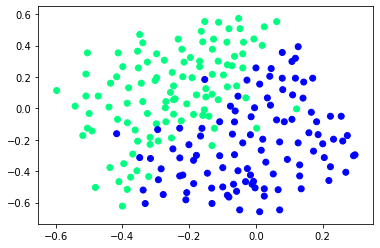

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap='winter')
plt.show()

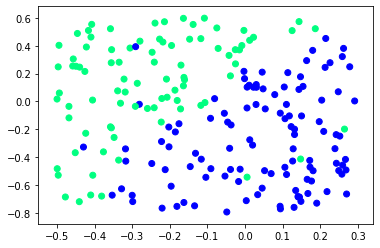

In [0]:
plt.scatter(Xval[:, 0], Xval[:, 1], c=yval[:,0], cmap='winter')
plt.show()

12.Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).